In [1]:
import numpy as np
from scipy.spatial import distance
import math

In [2]:
def sort(table1, table2):
    for i in range(len(table1)):
        for j in range(len(table1)):
            if table1[i]<table1[j]:
                    table1[i], table1[j]=table1[j], table1[i]
                    table2[i], table2[j]=table2[j], table2[i]
    return table1, table2

In [3]:
def fitnessFunction(point,ALPHA):
    xf,yf = point[:]
    xf = int(xf)
    yf = int(yf)
    
    if(image[xf][yf]<ALPHA):
        image[xf][yf]=0
    else:
        image[xf][yf]=255
        
    #return abs(150-image[xf][yf])
    return image[xf][yf]

In [4]:
def rfoa(populationSize, dimension, iterations,L,R,alpha1):
    foxes=[]
    fitness=[]
    values={'black':0,'white':0,'mean_black':0,'mean_white':0}
    #generate an initial population
    for i in range(populationSize):
        fox=[]
        
        #zmiana do tylko dwoch wymiarow x i y
        fox.append(np.random.randint(R))
        fox.append(np.random.randint(R))
        foxes.append(fox)    
        
    for i in range(len(foxes)):
        fitness.append(fitnessFunction(foxes[i],alpha1))
    fitness, foxes=sort(fitness,foxes)
    for j in fitness:
        if j==0: 
            values['black']+=1
            values['mean_black']+=j
        else:
            values['white']+=1
            values['mean_white']+=j
    
    
    for T in range(iterations):       
        #reproduction and leaving the herd            
        FromIndex=populationSize-0.05*populationSize
        for index in range(int(FromIndex),populationSize):
            habitatCenter=[]
            for i in range(dimension):
                habitatCenter.append(math.floor((foxes[0][i]+foxes[1][i])/2))
          #  habitatDiameter=distance.euclidean(foxes[0],foxes[1])
            kappa=np.random.uniform(0,1)
            if kappa>=0.45:
                for i in range(dimension):
                    foxes[index][i]=np.random.randint(L,R)
            else:
                for i in range(dimension):
                    foxes[index][i]=int(math.ceil(kappa*habitatCenter[i]))
        
        #global phase - food searching
        for i in range(len(foxes)):
            #distances.append(distance.euclidean(foxes[i],foxes[0]))
            alpha=np.random.uniform(0,distance.euclidean(foxes[i],foxes[0]))
            for j in range(dimension):
                value=1
                if foxes[0][j]-foxes[i][j]<0:
                        value=-1
                if foxes[i][j]+math.ceil((alpha*value))<R and foxes[i][j]+math.ceil(alpha*value)>L:  
                    foxes[i][j]+=int(math.ceil(alpha*value))
                elif foxes[i][j]-math.ceil(alpha*value)<R and foxes[i][j]-math.ceil(alpha*value)>L:  
                    foxes[i][j]-=int(math.ceil(alpha*value))
        #local phase - traversing through the local habitat
        a=np.random.uniform(0,0.2)
        for i in range(len(foxes)):
            if np.random.uniform(0,1)>0.75:
                phi=[]
                for xx in range(dimension):
                    phi.append(np.random.uniform(0,2*3.14))
                r=np.random.uniform(0,1)

                if phi[0] != 0:
                    r=np.random.randint(-5,5)#a*math.sin(phi[0])/phi[0]
                for j in range(dimension):
                    if j==0:
                        a= foxes[i][j]+int(math.ceil(a*r*math.cos(phi[0])))
                        b= foxes[i][j]-int(math.ceil(a*r*math.cos(phi[0])))
                        if a<R and a>L:  
                            foxes[i][j]=a
                        elif b<R and b>L:  
                            foxes[i][j]=b
                    else:
                        for k in range(j):
                            if k!=j:
                                a= int(math.ceil(foxes[i][j]+a*r*math.sin(phi[j])))
                                b= int(math.ceil(foxes[i][j]-a*r*math.sin(phi[j])))
                                if a<R and a>L:  
                                    foxes[i][j]=a
                                elif b<R and b>L:  
                                    foxes[i][j]=b
                            else:
                                a= int(math.ceil(foxes[i][j]+a*r*math.cos(phi[j])))
                                b= int(math.ceil(foxes[i][j]-a*r*math.cos(phi[j])))
                                if a<R and a>L:  
                                    foxes[i][j]=a
                                elif b<R and b>L:  
                                    foxes[i][j]=b
        fitness.clear()
        for i in range(len(foxes)):
            if(foxes[i][0]>L-1):
                foxes[i][0]=L-1
            if(foxes[i][1]>R-1):
                foxes[i][1]=R-1
            fitness.append(fitnessFunction(foxes[i],alpha1))
        fitness, foxes=sort(fitness,foxes)
        for j in fitness:
            if j==0: 
                values['black']+=1
                values['mean_black']+=j
            else:
                values['white']+=1
                values['mean_white']+=j
    return foxes[0],values


In [5]:
def changeImage(image, ALPHA):
    for i in range(0,256):
        for j in range(0,256):
            if(image[i][j]<ALPHA):
                image[i][j]=0
            else:
                image[i][j]=255
    return image


In [6]:
def AvgProp(values):
    #Average proportion
    return values['black']/values['white']

In [7]:
def AvgPropBCV(values):
    #Average product of proportion and BCV parameter
    proportion=AvgProp(values)
    no_pixels = values['black'] + values['white']
    BCV=values['black']*values['white']/(no_pixels)**2 * (values['mean_black']/values['black']-values['mean_white']/values['white'])**2
    BCV=BCV**0.5
    return BCV*proportion

In [8]:
tab=["/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot/02c0e019-97c2-48f5-ac40-90b8789e6288___FAM_B.Rot 0753.JPG"]
from PIL import Image,ImageOps,ImageFilter

for j in tab:
    counter=list()
    #alpha parameter to check is chosen randomly 50 times
    for i in range(50):
        image = Image.open(j)

        image = ImageOps.grayscale(image)
        image = image.resize((256,256))
        image=np.array(image)
        x,y=image.shape

        #run algorithm
        alpha=np.random.randint(255)
        _v, values=rfoa(100, 2, 100,0,256,alpha)
        if (values['white']>0 and values['black'])>0:
            #1
            #parameter = AvgProp(values)
            #2
            parameter = AvgPropBCV(values)
            
            counter.append((alpha, parameter))
    #extracting average
    avg=int((min(counter, key=lambda c: c[1])[0]+max(counter, key=lambda c: c[1])[0])/2)
    image = Image.open(j)
    image = ImageOps.grayscale(image)
    image = image.resize((256,256))
    image=np.array(image)
    img=changeImage(image,avg)
    import os
    os.makedirs("/kaggle/working/avg_", exist_ok=True)
    #Construct a simpler path for the segmented image
    path = "/kaggle/working/avg_" + os.path.basename(j)  # Use only the filename
    Image.fromarray(img).save(path)

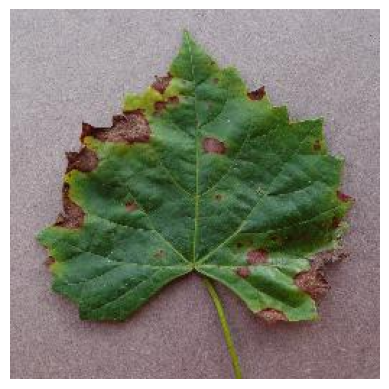

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

new_img_path = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot/02c0e019-97c2-48f5-ac40-90b8789e6288___FAM_B.Rot 0753.JPG'

# Load the image
img = mpimg.imread(new_img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

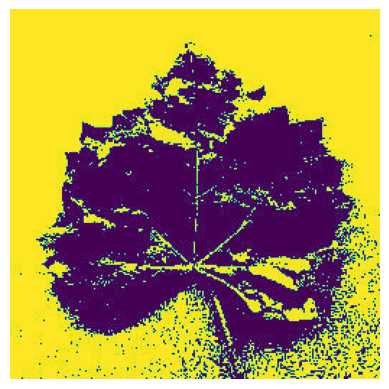

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

new_img_path = '/kaggle/working/avg_02c0e019-97c2-48f5-ac40-90b8789e6288___FAM_B.Rot 0753.JPG'

# Load the image
img = mpimg.imread(new_img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

In [12]:
tab=["/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot/02c0e019-97c2-48f5-ac40-90b8789e6288___FAM_B.Rot 0753.JPG"]
from PIL import Image,ImageOps,ImageFilter

for j in tab:
    counter=list()
    for i in range(10):
        image = Image.open(j)

        image = ImageOps.grayscale(image)
        image = image.resize((256,256))
        image=np.array(image)
        x,y=image.shape

        #uruchomienie algorytmu
        alpha=np.random.randint(255)
        _v, values=rfoa(1000, 2, 100,0,256,alpha)
        print("test no ",i)
        if values['white']>0:
            proportion=values['black']/values['white']
            counter.append((alpha, proportion))
            print('proportion b/w: ',proportion)
           # path=str(alpha)+"_"+str(proportion)+".jpg"
            #Image.fromarray(image).save(path)

    image = Image.open(j)
    image = ImageOps.grayscale(image)
    image = image.resize((256,256))
    image=np.array(image)
    img=changeImage(image,min(counter, key=lambda c: c[1])[0])
    os.makedirs("/kaggle/working/avg_21", exist_ok=True)
    #Construct a simpler path for the segmented image
    path = "/kaggle/working/avg_21" + os.path.basename(j)  # Use only the filename
    Image.fromarray(img).save(path)

test no  0
proportion b/w:  0.0016065372181122196
test no  1
proportion b/w:  0.0027799841143764893
test no  2
proportion b/w:  9.90108812958544e-06
test no  3
test no  4
proportion b/w:  0.0
test no  5
proportion b/w:  4.316069266803516
test no  6
test no  7
proportion b/w:  0.0005547630369313679
test no  8
proportion b/w:  951.8301886792453
test no  9


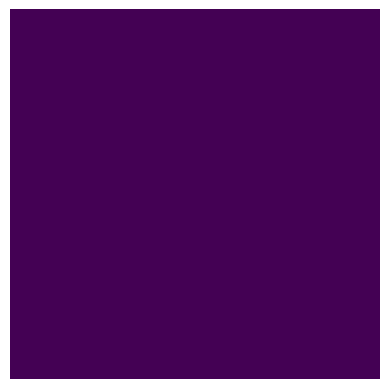

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

new_img_path = '/kaggle/working/avg_2102c0e019-97c2-48f5-ac40-90b8789e6288___FAM_B.Rot 0753.JPG'

# Load the image
img = mpimg.imread(new_img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


In [15]:
tab=["/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot/02c0e019-97c2-48f5-ac40-90b8789e6288___FAM_B.Rot 0753.JPG"]
from PIL import Image,ImageOps,ImageFilter

for j in tab:
    counter=list()
    #alpha parameter to check is chosen randomly 50 times
    for i in range(50):
        image = Image.open(j)

        image = ImageOps.grayscale(image)
        image = image.resize((256,256))
        image=np.array(image)
        x,y=image.shape

        #run algorithm
        alpha=np.random.randint(255)
        _v, values=rfoa(100, 2, 100,0,256,alpha)
        if (values['white']>0 and values['black'])>0:
            #1
            #parameter = AvgProp(values)
            #2
            parameter = AvgPropBCV(values)
            
            counter.append((alpha, parameter))
            
    best_alpha = max(counter, key=lambda c: c[1])[0]
    #extracting average
    avg=int((min(counter, key=lambda c: c[1])[0]+max(counter, key=lambda c: c[1])[0])/2)
    image = Image.open(j)
    image = ImageOps.grayscale(image)
    image = image.resize((256,256))
    image=np.array(image)
    # Perform segmentation
    mask = changeImage(image, best_alpha)  # Use image for mask

  # Create directory if it doesn't exist
    os.makedirs("/kaggle/working/", exist_ok=True)  # Adjust output directory

  # Save the mask (modify path and filename as needed)
    path = "/kaggle/working/" + os.path.basename(j) + "_mask.jpg"
    Image.fromarray(mask).save(path)

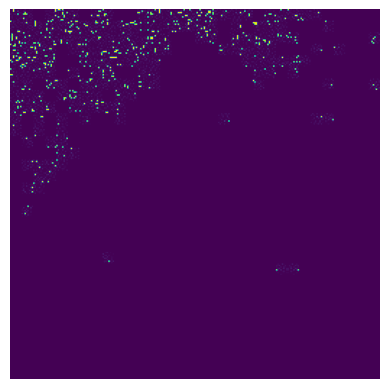

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

new_img_path = '/kaggle/working/02c0e019-97c2-48f5-ac40-90b8789e6288___FAM_B.Rot 0753.JPG_mask.jpg'

# Load the image
img = mpimg.imread(new_img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()
